<a href="https://colab.research.google.com/github/fingerman/DeepLearning/blob/master/Fully_Connected_Neural_Networks_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


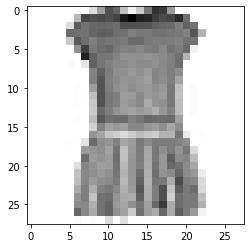

In [4]:
plt.imshow(x_train[3], cmap = plt.cm.binary)

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# flatten each image before we can pass it into our neural network
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [40]:
model = Sequential([
    
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation = tf.nn.softmax)
    ])
# `input_shape` is the shape of the input data e.g. input_shape = (None, 32, 32, 3)
# in this case we have just one color
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'] )

In [43]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=40,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 117us/sample - loss: 1.4568 - acc: 0.7135 - val_loss: 0.6729 - val_acc: 0.7910
Epoch 2/40
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5961 - acc: 0.7968 - val_loss: 0.5457 - val_acc: 0.8142
Epoch 3/40
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5042 - acc: 0.8268 - val_loss: 0.5445 - val_acc: 0.8144
Epoch 4/40
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4599 - acc: 0.8385 - val_loss: 0.5284 - val_acc: 0.8213
Epoch 5/40
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4353 - acc: 0.8455 - val_loss: 0.5081 - val_acc: 0.8241
Epoch 6/40
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4075 - acc: 0.8537 - val_loss: 0.4463 - val_acc: 0.8421
Epoch 7/40
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3941 - acc: 0.8578 - val_l

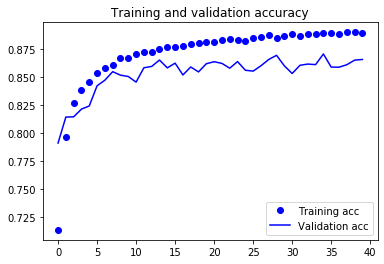

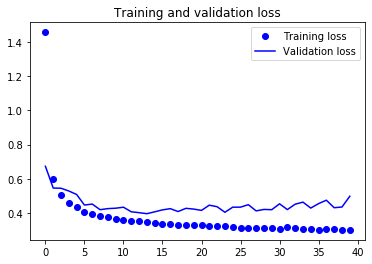

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
print("Best Validation/Test Accuracy: ", max(val_acc))

Best Validation/Test Accuracy:  0.8705


In [48]:
# Predict on the first 5 test images.
predictions = model.predict(x_test[:30])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:30]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0 0 5 7 5 1 2 6 0 9 3]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]
